In [3]:
# Define required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# define filename
DATA_PATH = 'fashion-mnist_train.csv'

In [5]:
data = pd.read_csv(DATA_PATH)

In [6]:
# Display the first five rows
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
'''The mapping between the numeric value in the label column and the category is not 
  included in the dataset, but defined as follows:

    0 - T-shirt/top
    1 - Trouser
    2 - Pullover
    3 - Dress
    4 - Coat
    5 - Sandal
    6 - Shirt
    7 - Sneaker
    8 - Bag
    9 - Ankle boot

For example, in row 0 (the first row), the numeric label value is 2, 
which represents a pullover.'''

'The mapping between the numeric value in the label column and the category is not \n  included in the dataset, but defined as follows:\n\n    0 - T-shirt/top\n    1 - Trouser\n    2 - Pullover\n    3 - Dress\n    4 - Coat\n    5 - Sandal\n    6 - Shirt\n    7 - Sneaker\n    8 - Bag\n    9 - Ankle boot\n\nFor example, in row 0 (the first row), the numeric label value is 2, \nwhich represents a pullover.'

In [8]:
#summary of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None


In [9]:
# Shape of the Dataset
print(data.shape)

(60000, 785)


In [10]:
# Labels of the Dataset
print(data.columns)

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [12]:
#print(data.dtypes)

In [13]:
label_data = data['label']

In [15]:
#print(label_data)

In [16]:
print(label_data.head())

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64


In [18]:
#display the first row of the data
#print(data.loc[0])

In [19]:
# count total number of unique values in the `label` column
len(data['label'].unique())

10

In [20]:
# Number of data points under each label
data['label'].value_counts()
#We can see that there are 6,000 images associated with each label, 
#for a total of 10 * 6000 = 60000 pictures. This is a balanced dataset in terms of 
#class distribution.

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [21]:
# Visualizing the data##

In [22]:
# Save the data points as 'input_data'
input_data = data.iloc[:,1:] / 255
# Check the shape of the input data
print('Shape of the input data',input_data.shape)
# Preview a few rows
input_data.head()

Shape of the input data (60000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [23]:
# Save the label(in 0-9 format) as 'target'
target = data[['label']].iloc[:, :]
# Check the shape of the label/category
print('Shape of the input label', target.shape)
# Preview a few rows
target.head()

Shape of the input label (60000, 1)


,label
0,2
1,9
2,6
3,0
4,3


In [24]:
# Manually enter the meaningful name of each label
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

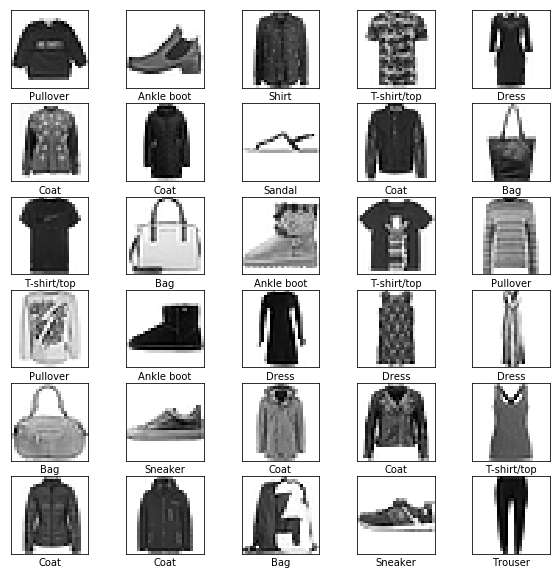

In [25]:
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(input_data.iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[target.label.iloc[i]])

In [26]:
from __future__ import print_function
import time
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [27]:
# Give multiple pixel columns one name: features
features = ['pixel' + str(i+1) for i in range(input_data.shape[1]) ]
# Create a new DataFrame df
pca_df = pd.DataFrame(input_data, columns=features)
# Add an additional column 'y', identical with label values in data
pca_df['label'] = target['label']

print('Size of the dataframe: {}'.format(pca_df.shape))

Size of the dataframe: (60000, 785)


In [28]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(pca_df.shape[0]):
    # Extract the label for comparison
    if pca_df['label'][i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif pca_df['label'][i] == 1:
        results.append('Trouser')
    elif pca_df['label'][i] == 2:
        results.append('Pullover')
    elif pca_df['label'][i] == 3:
        results.append('Dress')
    elif pca_df['label'][i] == 4:
        results.append('Coat')
    elif pca_df['label'][i] == 5:
        results.append('Sandal')
    elif pca_df['label'][i] == 6:
        results.append('Shirt')
    elif pca_df['label'][i] == 7:
        results.append('Sneaker')
    elif pca_df['label'][i] == 8:
        results.append('Bag')
    elif pca_df['label'][i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(pca_df['label'][i]))

# Create a new column named result which has all meaningful results        
pca_df['result'] = results

In [29]:
# Set first three principle components
pca = PCA(n_components=3)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
pca_result = pca.fit_transform(pca_df[features].values)

In [30]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29011353 0.17727668 0.060227  ]


In [31]:
pca_df['First Dimension'] = pca_result[:,0]
pca_df['Second Dimension'] = pca_result[:,1] 
pca_df['Third Dimension'] = pca_result[:,2]

In [32]:
# Preview the first few rows in the `pca_df` data frame.
pca_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel780,pixel781,pixel782,pixel783,pixel784,label,result,First Dimension,Second Dimension,Third Dimension
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,2,Pullover,3.686333,4.960529,-0.051232
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,9,Ankle boot,-4.376434,3.861059,-1.949433
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,6,Shirt,7.265152,1.568757,2.315239
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.003922,0.0,0.0,0.0,0.0,0,T-shirt/top,3.227788,-2.325256,-0.649302
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,3,Dress,4.146373,-4.039080,-1.515247


Text(0.5,0.98,'3-Component PCA')

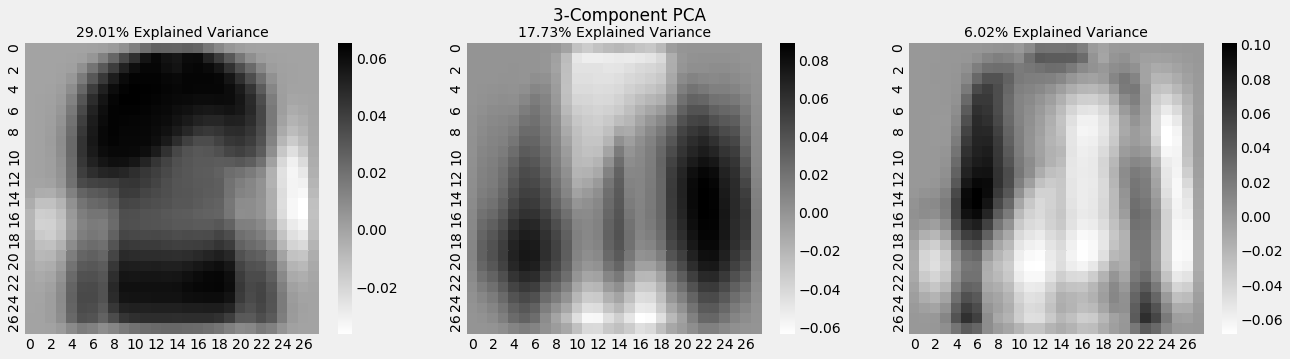

In [33]:
# Set the graph style as 'fivethirtyeight'
plt.style.use('fivethirtyeight')
#Set figure size
fig, axarr = plt.subplots(1, 3, figsize=(20, 5))
# use seaborn heatmap to visualize the first three pca components
sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap=plt.cm.binary)
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap=plt.cm.binary)
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[2], cmap=plt.cm.binary)
# Set picture title to explained variance
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
axarr[2].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100), fontsize=14)
# Add picture title
plt.suptitle('3-Component PCA')

In [34]:
# initializing the pca
# Set n_components as 784 dimensions
pca = decomposition.PCA(n_components = 784)
# Fit on training data
pca_784 = pca.fit_transform(pca_df[features].values)
#percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
var_ratios = np.cumsum(pca.explained_variance_ratio_)

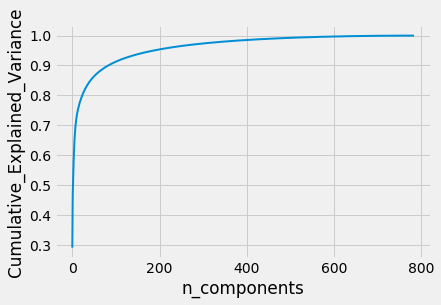

In [35]:
# Plot the PCA spectrum
plt.figure(figsize=(6, 4))
plt.plot(var_ratios, linewidth=2)
plt.xlabel("n_components")
plt.ylabel("Cumulative_Explained_Variance")
plt.show()

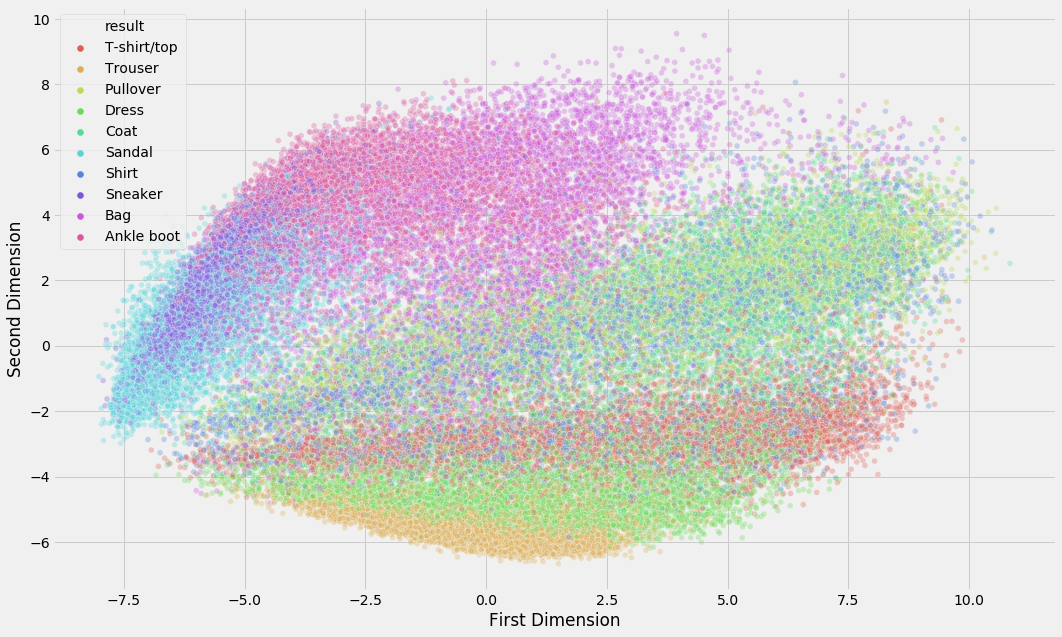

In [36]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="First Dimension", y="Second Dimension",
    hue = "result",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)

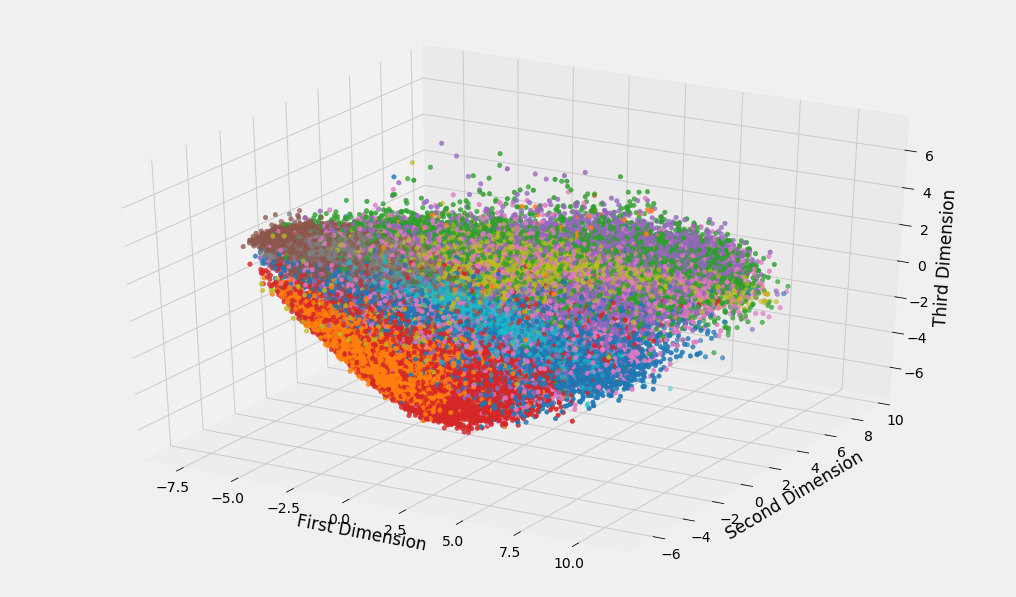

In [37]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=pca_df["First Dimension"], 
    ys=pca_df["Second Dimension"], 
    zs=pca_df["Third Dimension"], 
    c=pca_df["label"], 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

In [38]:
#Visualize using t-Distributed Stochastic Neighbouring Entities

In [39]:
# Create a random generator, so to decreases potential biases in the data
rand = np.random.permutation(pca_df.shape[0])

In [40]:
# Pull 10000 pictures out of the sample
N = 10000
pca_df_subset = pca_df.loc[rand[:N],:].copy()
data_subset = pca_df_subset[features].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
pca_df_subset['First Dimension'] = pca_result[:,0]
pca_df_subset['Second Dimension'] = pca_result[:,1] 
pca_df_subset['Third Dimension'] = pca_result[:,2]
print('Explained variation in each principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation in each principal component: [0.29277462 0.17759364 0.05907295]


In [41]:
# Keep track of time elapsed in the method
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE finished! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.782s...
[t-SNE] Computed neighbors for 10000 samples in 168.074s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.790242
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.600220
[t-SNE] KL divergence after 300 iterations: 2.531190
t-SNE finished! Time el

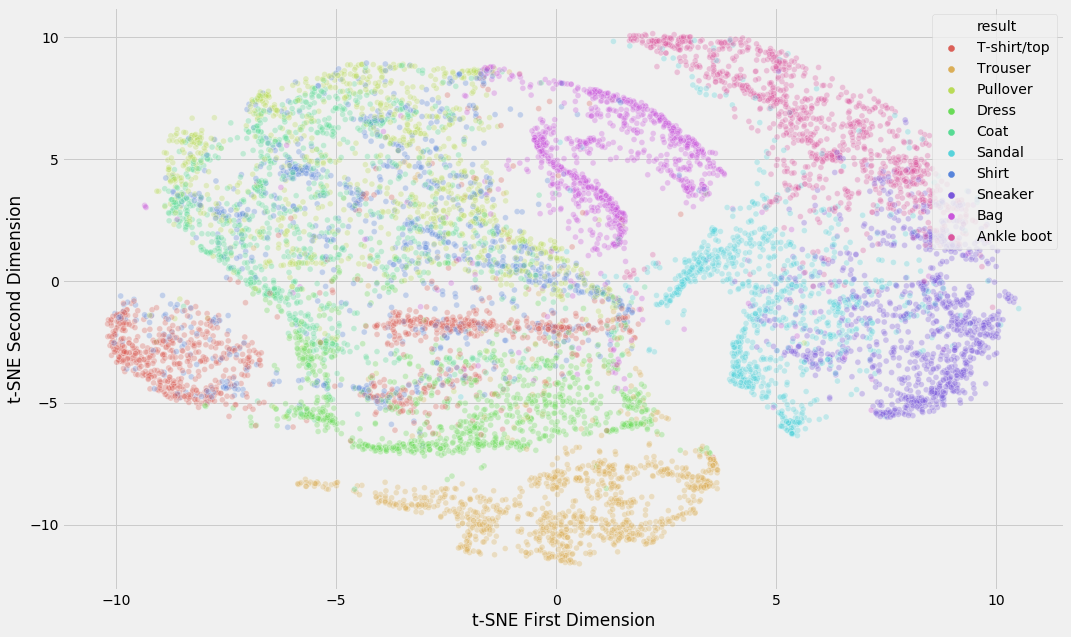

In [42]:
pca_df_subset['t-SNE First Dimension'] = tsne_results[:,0]
pca_df_subset['t-SNE Second Dimension'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="t-SNE First Dimension", y="t-SNE Second Dimension",
    hue="result",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=pca_df_subset,
    legend="full",
    alpha=0.3
)

In [43]:
#Machine Learning and Model Comparisons on Fashion MNIST Dataset

In [44]:
# Define required imports
import pandas as pd
import numpy as np

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from warnings import filterwarnings
filterwarnings('ignore')


In [45]:
data10 = pd.read_csv(DATA_PATH).values

# Preview data (label, followed by pixel data)
#data

In [46]:
print(data10.shape)

(60000, 785)


In [47]:
print(data10)

[[2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 ...
 [8 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]]


In [49]:
# Save the pixel data as "pixel"
pixel = data10[:, 1:]

# Save the label data as "label"
label = data10[:, 0]

In [50]:
def calculate_metrics(label, label_predict):
    """
    Calculate accuracy, precision, recall and f-score
    """
    acc_score = accuracy_score(label, label_predict)
    pre_score = precision_score(label, label_predict, average='weighted')
    rec_score = recall_score(label, label_predict, average='weighted')
    f_score = f1_score(label, label_predict, average='weighted')
    return (acc_score, pre_score, rec_score, f_score)

def display_metrics(label, label_predict):
    """
    Calculate and display accuracy, precision, recall and f-score
    """
    scores = calculate_metrics(label, label_predict)
    print("Model Accuracy : {}".format(scores[0]))
    print("Model Precision: {}".format(scores[1]))
    print("Model Recall   : {}".format(scores[2]))
    print("Model F-Score  : {}".format(scores[3]))

    
def display_scores(scores):
    """
    Display scores (e.g. accuracy, precision, etc.) and calculate mean
    and standard deviation
    """
    print("Scores            : {}".format(scores))
    print("Mean              : {}".format(scores.mean()))
    print("Standard deviation: {}".format(scores.std()))

In [51]:
# Build an sklearn.tree.DecisionTreeClassifier from the training dataset
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, random_state=42)

# Train the classifier
decision_tree.fit(pixel, label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [52]:
# Test classifier using the pixel data
label_predict = decision_tree.predict(pixel)

# Review the first 20 labels and predicted labels
print('Correct labels  : {}'.format(label[:20]))
print('Predicted labels: {}'.format(label_predict[:20]))

Correct labels  : [2 9 6 0 3 4 4 5 4 8 0 8 9 0 2 2 9 3 3 3]
Predicted labels: [2 9 4 0 3 4 4 5 4 8 0 8 9 6 2 2 9 3 0 3]


In [53]:
# display model performance stats
display_metrics(label, label_predict)

Model Accuracy : 0.8479666666666666
Model Precision: 0.8507829440982037
Model Recall   : 0.8479666666666666
Model F-Score  : 0.848208267661459


In [54]:
# Scaled Features not required for Decision Tree
decision_tree_scores = cross_val_score(decision_tree, pixel, label, cv=3, scoring="accuracy") 
display_scores(decision_tree_scores)

label_predcv = cross_val_predict(decision_tree, pixel, label, cv=3)
decision_tree_cv = calculate_metrics(label,label_predcv)

Scores            : [0.80325 0.80905 0.8016 ]
Mean              : 0.8046333333333333
Standard deviation: 0.0031948743672048177


In [55]:
# Create an sklearn.preprocessing.StandardScaler instance :: Linear Classifier
scaler = StandardScaler()

# Map pixels with the Scaler
pixel_scaled = scaler.fit_transform(pixel.astype(np.float64))

In [56]:
# Create an sklearn.linear_model.SGDClassifier
sgd = SGDClassifier(loss='hinge', random_state=42, penalty='l2')

# train the classifier using the labels and the feature-scaled pixel values 
sgd.fit(pixel_scaled, label)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
# Test classifier using the pixel data
label_predict = sgd.predict(pixel_scaled)

# display model performance stats
display_metrics(label, label_predict)

Model Accuracy : 0.8407166666666667
Model Precision: 0.8397222848443929
Model Recall   : 0.8407166666666667
Model F-Score  : 0.8370616634003265


In [58]:
sgd_scores = cross_val_score(sgd, pixel_scaled, label, cv=3, scoring="accuracy") 
display_scores(sgd_scores)

label_predcv = cross_val_predict(sgd, pixel_scaled, label, cv=3)
linear_classifier_cv = calculate_metrics(label,label_predcv)

Scores            : [0.8331  0.83045 0.82935]
Mean              : 0.8309666666666665
Standard deviation: 0.0015739193823770365


In [59]:
# Create an sklearn.linear_model.LogisticRegression classifier
log = LogisticRegression(multi_class="ovr", penalty='l2', solver="lbfgs", C=10, random_state=42)

# train the classifier using the labels and the feature-scaled pixel values 
log.fit(pixel_scaled, label)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
# predict dataset pixel_scaled using trained model
label_predict = log.predict(pixel_scaled)

# display model performance stats
display_metrics(label, label_predict)

Model Accuracy : 0.8742
Model Precision: 0.8727309764324231
Model Recall   : 0.8742
Model F-Score  : 0.8729269481247982


In [61]:
log_scores = cross_val_score(log, pixel_scaled, label, cv=3, scoring="accuracy") 
display_scores(log_scores)

label_predcv = cross_val_predict(log, pixel_scaled, label, cv=3)
log_regression_cv = calculate_metrics(label,label_predcv)

Scores            : [0.8466 0.8456 0.8437]
Mean              : 0.8453
Standard deviation: 0.0012027745701779203


In [62]:
model_comparison_df = pd.DataFrame([decision_tree_cv, linear_classifier_cv, log_regression_cv], 
                                   columns =['Accuracy', 'Precision', 'Recall', 'F-Score'], 
                                   index=['decision_tree_cv', 'linear_classifier_cv', 'log_regression_cv'])
model_comparison_df

,Accuracy,Precision,Recall,F-Score
decision_tree_cv,0.804633,0.805922,0.804633,0.803913
linear_classifier_cv,0.830967,0.832031,0.830967,0.829820
log_regression_cv,0.845300,0.843194,0.845300,0.843769
